In [5]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [6]:
# Read the Image
image= mpimg.imread("/content/test_image/solidWhiteRight.jpg")

In [11]:
# Grab the x and y size and make a copy of the image.
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define the color selection criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
thresholds = (image[:,:,0] < rgb_threshold[0]) \
          | (image[:,:,1] < rgb_threshold[1])  \
          | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

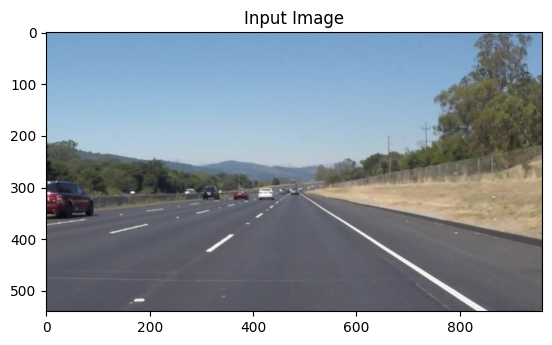

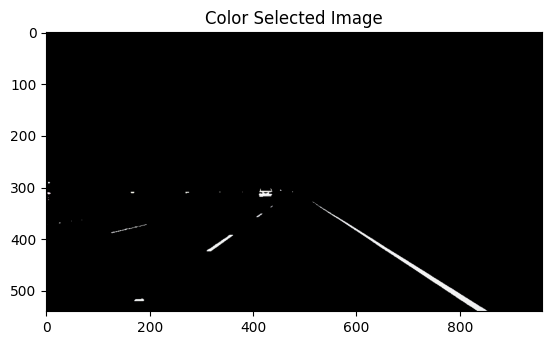

In [12]:
# Display the image
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(color_select)
plt.title("Color Selected Image")
plt.show()

In [18]:
image= mpimg.imread("/content/test_image/solidWhiteRight.jpg")

# Grab the x and y size and make a copy of the image.
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
                 | (image[:,:,1] < rgb_threshold[1])  \
                 | (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0,0,0]

# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9,255,0]

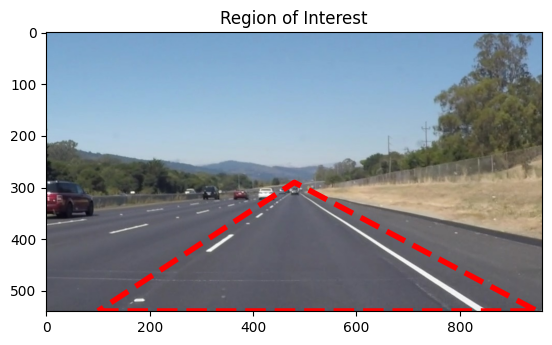

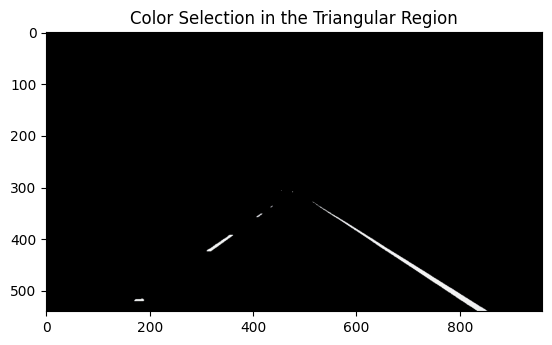

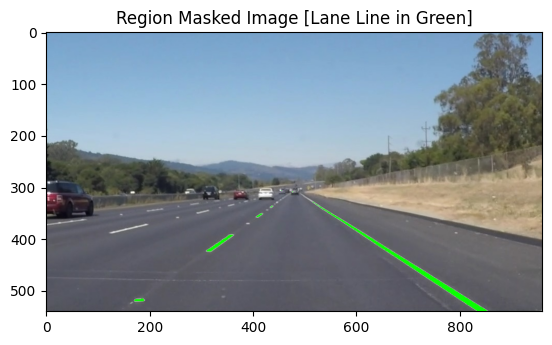

In [19]:
# Display the image and show region and color selections (Right lane)
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, "r--", lw=4)
plt.title("Region of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection in the Triangular Region")
plt.show()
plt.imshow(line_image)
plt.title("Region Masked Image [Lane Line in Green]")
plt.show()

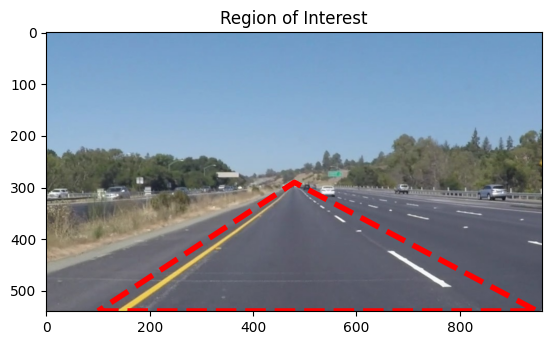

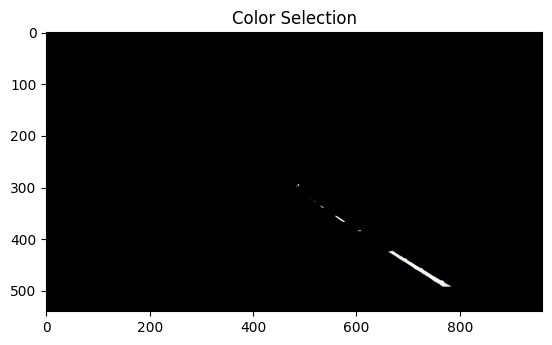

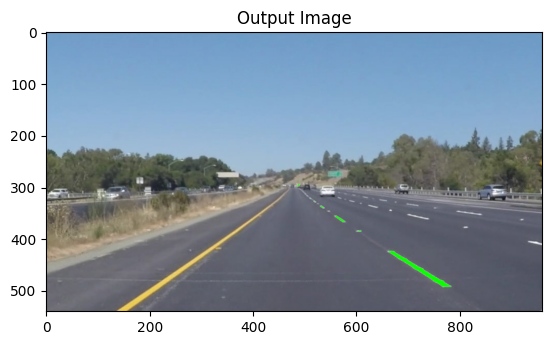

In [21]:
# Left Lane Detection
image= mpimg.imread("/content/test_image/solidYellowLeft.jpg")

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
                 | (image[:,:,1] < rgb_threshold[1])  \
                 | (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0,0,0]

# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [9,255,0]

# Display the image and show region and color selections (left lane)
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, "r--", lw=4)
plt.title("Region of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection")
plt.show()
plt.imshow(line_image)
plt.title("Output Image")
plt.show()

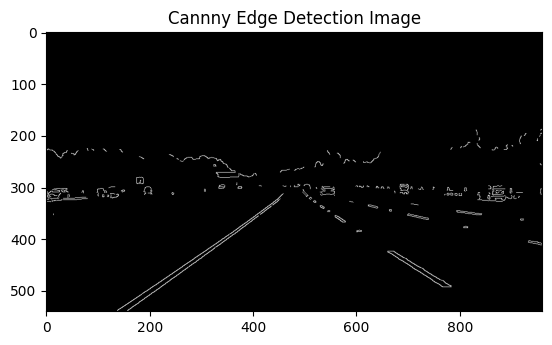

In [24]:
# Using OpenCV Canny Edge Detection
image = mpimg.imread("/content/test_image/solidYellowLeft.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernal_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernal_size, kernal_size),0)

# Define our parameters for Canny and run it
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display Image
plt.imshow(edges, cmap=("Greys_r"))
plt.title("Cannny Edge Detection Image")
plt.show()

In [25]:
# Using OpenCV Canny Edge Detection
image = mpimg.imread("/content/test_image/solidYellowLeft.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernal_size = 3
blur_gray = cv2.GaussianBlur(gray,(kernal_size, kernal_size),0)

# Define our parameters for Canny and run it
low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask= np.zeros_like(edges)
ignore_mask_color = 255

# This time we are defining a four sided polygon to mask
imgshape = image.shape
vertices = np.array([[(0, imgshape[0]),(450,290), (450,290), (imgshape[1], imgshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

In [28]:
# Define the Hough transform parameters
rho = 1
theta = np.pi/180
threshold = 2
min_line_length = 4
max_line_gap = 5
line_image = np.copy(image)*0

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))

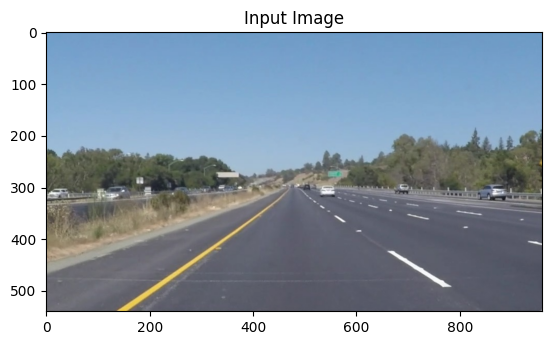

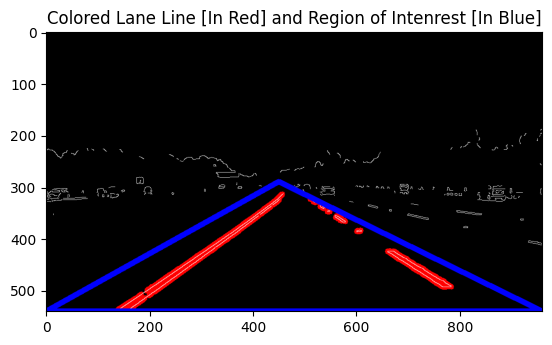

In [29]:
# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
lines_edges = cv2.polylines(lines_edges, vertices, True, (0,0,255), 10)
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(lines_edges)
plt.title("Colored Lane Line [In Red] and Region of Intenrest [In Blue]")
plt.show()

In [71]:
# Let's Make a Lane Detection Pipeline
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    return cv2.bitwise_and(img, mask)

def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    if lines is None:
        return
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def slope_lines(image, lines):
    img = image.copy()
    left_lines = []
    right_lines = []
    rows, cols = image.shape[:2]

    if lines is None:
        return img

    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 == x2:
                continue
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - slope * x1
            if abs(slope) < 0.5:
                continue
            if slope < 0:
                left_lines.append((slope, intercept))
            else:
                right_lines.append((slope, intercept))

    y1 = rows
    y2 = int(rows * 0.6)
    poly_vertices = []

    if len(left_lines) > 0:
        left_slope, left_intercept = np.mean(left_lines, axis=0)
        x1_left = int((y1 - left_intercept) / left_slope)
        x2_left = int((y2 - left_intercept) / left_slope)
        cv2.line(img, (x1_left, y1), (x2_left, y2), (255, 0, 0), 10)
        poly_vertices.extend([(x1_left, y1), (x2_left, y2)])

    if len(right_lines) > 0:
        right_slope, right_intercept = np.mean(right_lines, axis=0)
        x1_right = int((y1 - right_intercept) / right_slope)
        x2_right = int((y2 - right_intercept) / right_slope)
        cv2.line(img, (x1_right, y1), (x2_right, y2), (0, 0, 255), 10)
        poly_vertices.extend([(x2_right, y2), (x1_right, y1)])

    if len(poly_vertices) == 4:
        pts = np.array([poly_vertices], dtype=np.int32)
        cv2.fillPoly(img, pts, (0, 255, 0))

    return cv2.addWeighted(image, 0.7, img, 0.4, 0.)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold,
                            np.array([]),
                            minLineLength=min_line_len,
                            maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    return slope_lines(line_img, lines)

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

def get_vertices(image):
    rows, cols = image.shape[:2]
    bottom_left = [cols * 0.1, rows]
    top_left = [cols * 0.45, rows * 0.6]
    bottom_right = [cols * 0.9, rows]
    top_right = [cols * 0.55, rows * 0.6]
    return np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)

def lane_finding_pipeline(image):
    gray = grayscale(image)
    blur = gaussian_blur(gray, 5)
    edges = canny(blur, 50, 150)
    roi = region_of_interest(edges, get_vertices(image))
    hough = hough_lines(roi, rho=1, theta=np.pi / 180, threshold=20,
                        min_line_len=20, max_line_gap=300)
    return weighted_img(hough, image)

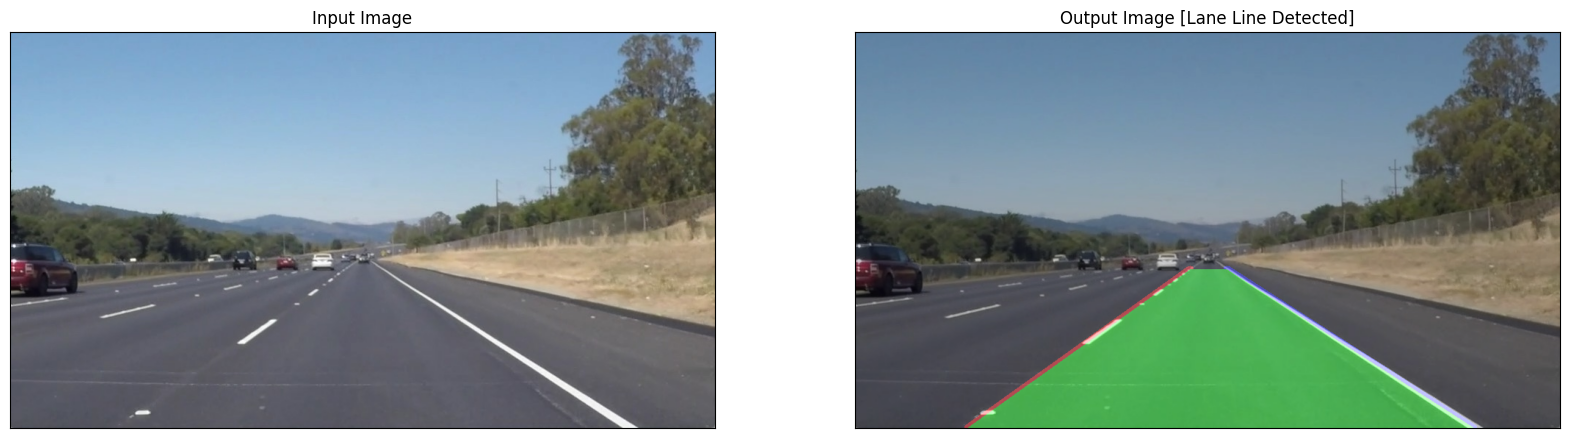

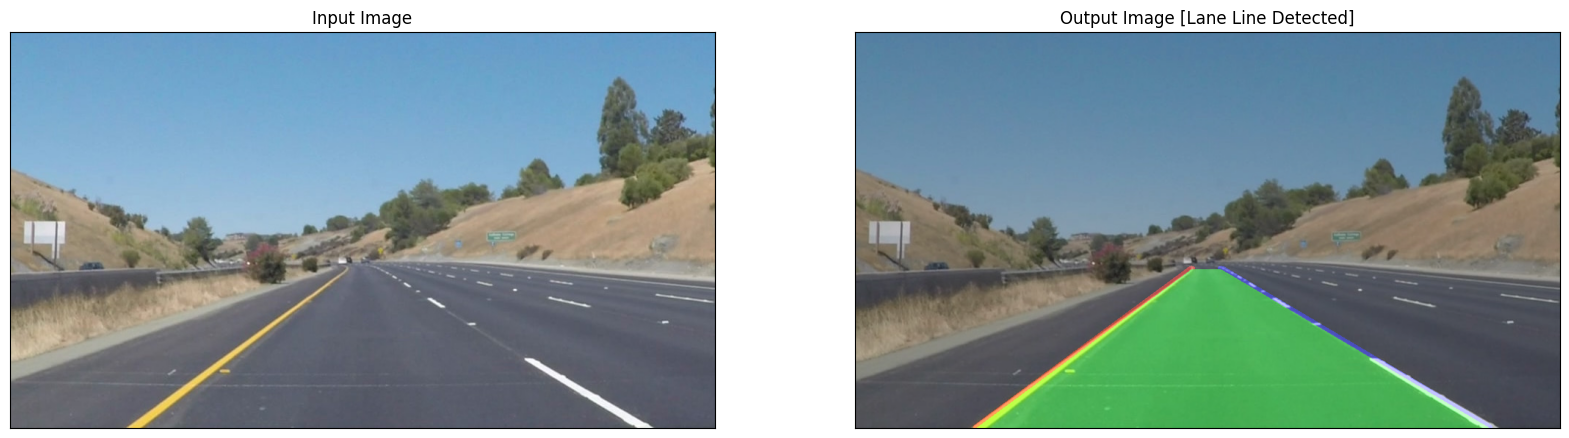

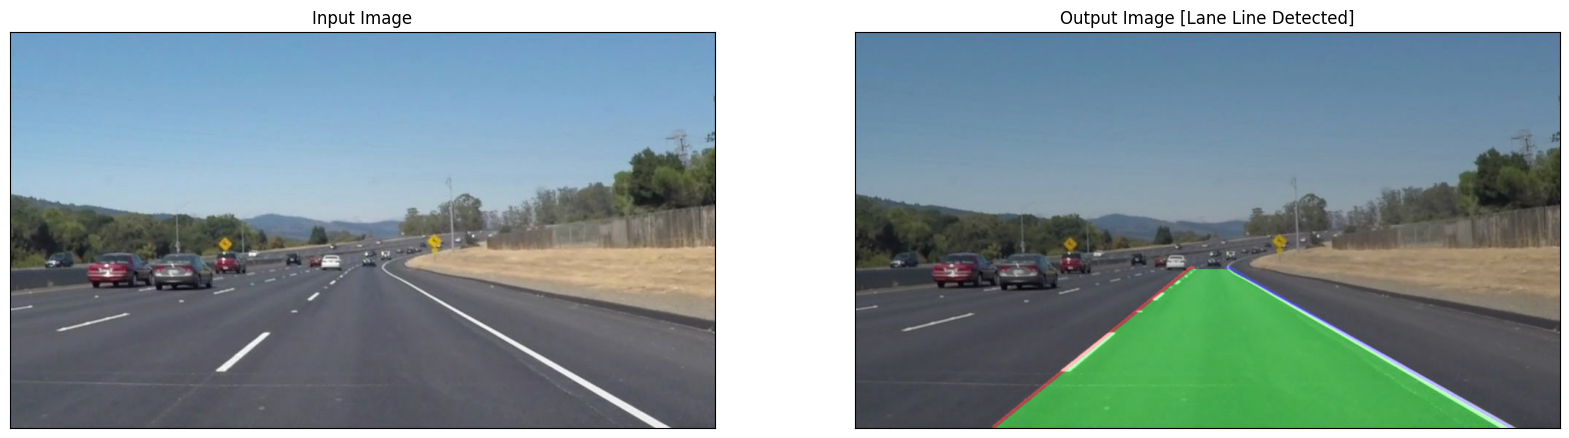

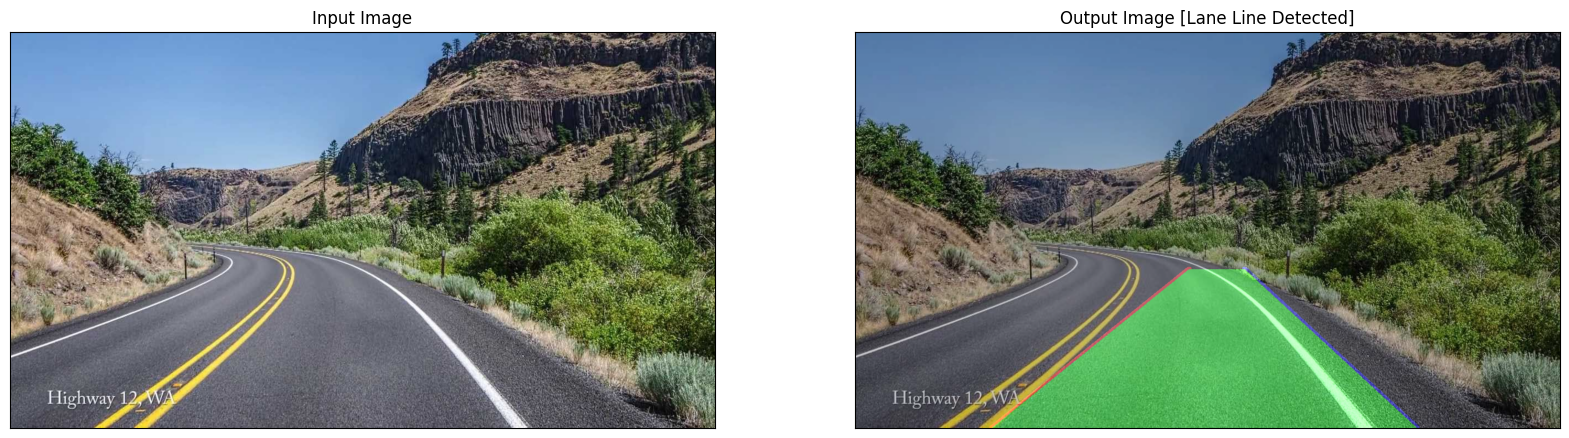

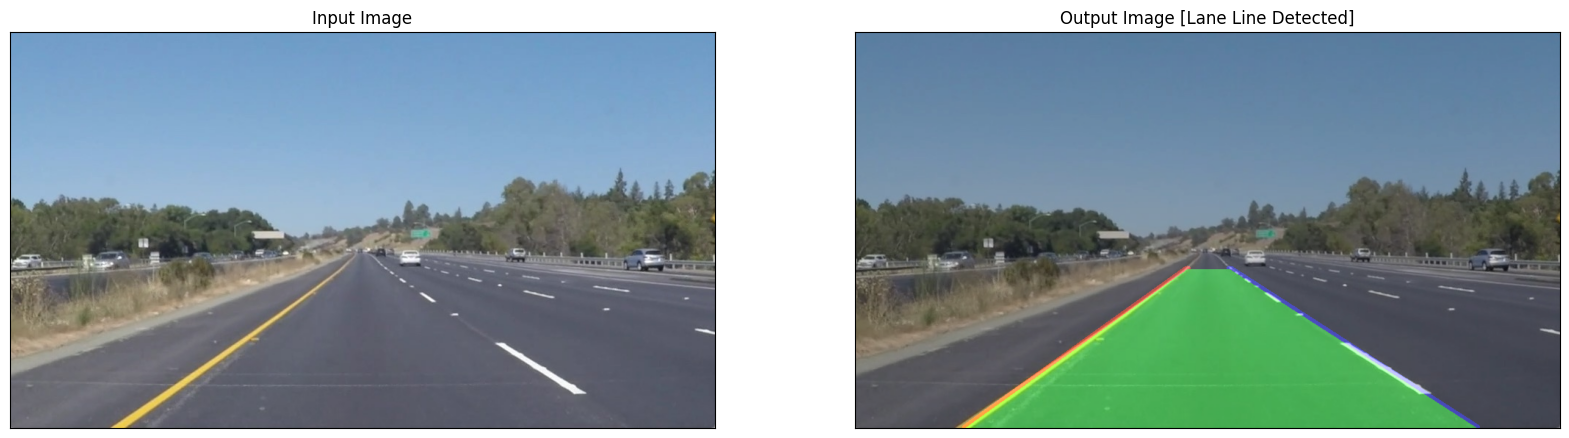

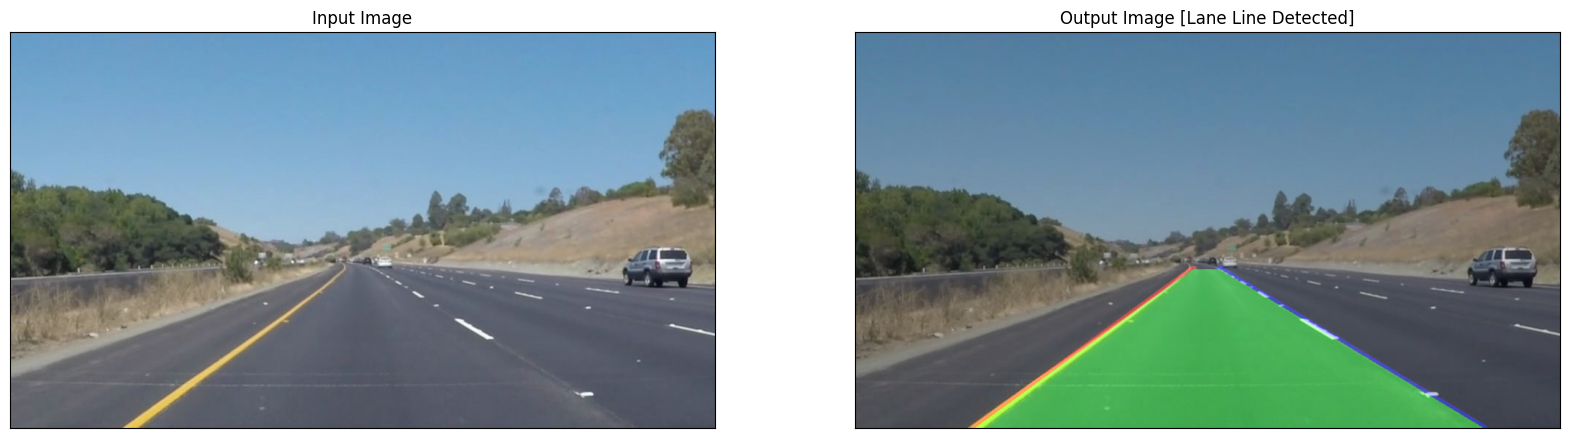

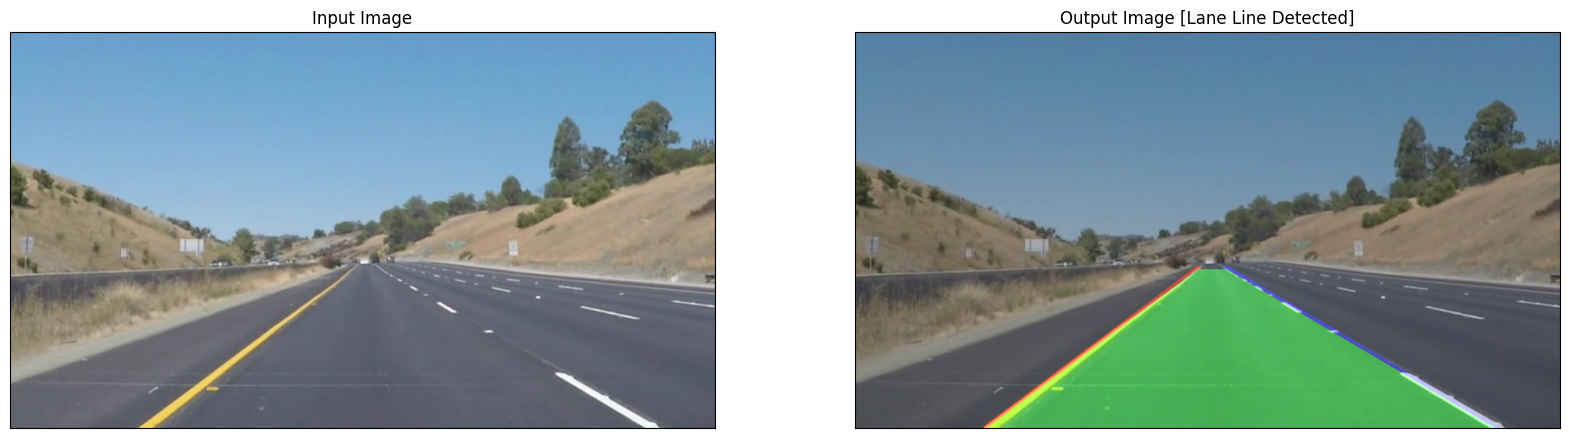

In [72]:
# Test our Algorithm Pipeline with different Images
for image_path in list(os.listdir('./test_image')):
    fig = plt.figure(figsize=(20, 10))
    image = mpimg.imread(f'./test_image/{image_path}')
    ax = fig.add_subplot(1, 2, 1,xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title("Input Image")
    ax = fig.add_subplot(1, 2, 2,xticks=[], yticks=[])
    plt.imshow(lane_finding_pipeline(image))
    ax.set_title("Output Image [Lane Line Detected]")
    plt.show()